# Mini Project 3: Bank Fraud Detection

#### 1. Given the data below, please classify the two cluster data and find the boundary line to devide the two groups. Use visualization to show your answer. 

In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn import datasets

X,Y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, random_state=2)

In [362]:
X.shape

(200, 2)

In [363]:
Y.shape

(200,)

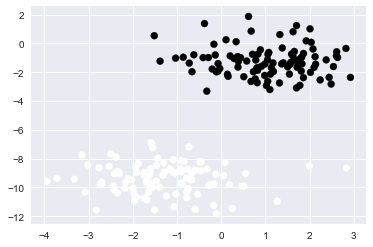

In [364]:
## IDK why, the points in the praph were yellow and purple before I reran the same code. Any clues??
plt.scatter(X[:,0],X[:,1],c=Y)

In [365]:
# Boundry line using SVM
from sklearn import svm
svm.SVC?

In [366]:
svc = svm.SVC(kernel='linear',).fit(X,Y)

In [367]:
# Set min and max values and give it some padding
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

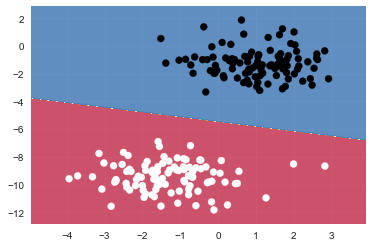

In [368]:
# Found this code online. why would we need to concatenate? 
# Predict the function value for the whole grid
Z = svc.predict(np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)),axis=1))
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)


plt.scatter(X[:, 0], X[:, 1], c=Y)


plt.show()

In [369]:
#  How to use plot_decision_boundary() in this case? What would be the model to put in? 

#### 2. In problem 1, we use classification method to classify two two-feature groups. What if the number of features increase? How can we use the method we learned from the class to solve more complicated problems. Following you will need to solve a Bank Fraud Detection Case where you will classify two multiple-feature groups.

**Data Description:**

**label.test.csv** - the test set, contains customer’s basic attributes and payment histories. You must predict whether these customers are credible or not.

**sample submission.csv** - a file showing the correct submission format. You must replace the NA’s with the predicted class labels. You should show your results by submitting the .csv file according to the format of this sample submission.csv.

**id**: A unique Id field which represents a customer

**X1**: Credit lineX2: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). X4: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. X6 = September, 2015;

**X7** = August, 2015;

**X11** =April, 2015. -1 = pay one month ahead; -2 = pay two month ahead; 0 = pay on time; Positive means the payment delayed months, 1 = delay 1 month, 2 = delay 2 months, etc.X12- X17: Amount in bill statement.

**X12** = amount of bill statementSeptember, 2015

**X13** = amount of bill statementAugust, 2015

**X17** = amount of bill statementApril, 2015. 

**X18-X23**: Amount of previous payment

**X18** = amount paid in September, 2015; X19 = amount paid in August, 2015; X23 = amount paid in April, 2015.

**Y**: A binary response variable to indicate whether the customer is creditable (1) or not (0).

This is a real problem to classify multi-feature data into two groups.


**Hint for steps**
1.	Load data
2.	There are so many features, please discern the categorical and continuous variables.
3.	Check if features have linear relationship between each other.
( You can google “Component Analysis with KMeans visuals – Kaggle” and learn how to do this step from Kaggle website)
4.	You don’t need to do PCA right now. 
5.	Choose the proper method to train the model:
binary classification Models: Logistic regression, Support vector machine, Naive Bayes, k-nearest neighbors, neural network, Decision tree…

6.	Evaluate your model. 
7.	Use your model to train the data. And make your submission file.


In [370]:
# 1) 
train = pd.read_csv ('train.csv')
test = pd.read_csv ('test.csv')

In [371]:
train.head()

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,200000,2,3,1,53,0,0,0,0,...,133207,136159,138741,6500,5000,5000,5100,5000,5400,0
1,2,130000,2,3,2,39,0,0,0,2,...,130814,130758,123468,7500,10000,0,4500,4500,4179,0
2,3,350000,2,1,2,41,0,0,0,0,...,119947,117328,118400,6000,5900,5800,4100,4500,5000,0
3,4,240000,2,2,1,43,1,-2,-2,-1,...,12700,12500,26225,0,0,12700,0,13725,0,0
4,5,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0


In [372]:
data_type= train.dtypes
for i in range(len(data_type)):
    print(data_type.index[i],data_type[i])

id int64
X1 int64
X2 int64
X3 int64
X4 int64
X5 int64
X6 int64
X7 int64
X8 int64
X9 int64
X10 int64
X11 int64
X12 int64
X13 int64
X14 int64
X15 int64
X16 int64
X17 int64
X18 int64
X19 int64
X20 int64
X21 int64
X22 int64
X23 int64
Y int64


In [373]:
# Another way, not applicable here
#num_col = train._get_numeric_data().columns


In [374]:
# 2) From observations, X2,X3, X4, X6 - X11 are categorical vars
catcols = list(train[['X2','X3','X4','X6','X7','X8','X9','X10','X11']])
catcols

['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']

In [375]:
numcols = list((x for x in train.columns if x not in catcols))
numcols

['id',
 'X1',
 'X5',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'Y']

In [376]:
numcols.remove('id')

In [377]:
numcols.remove('Y')

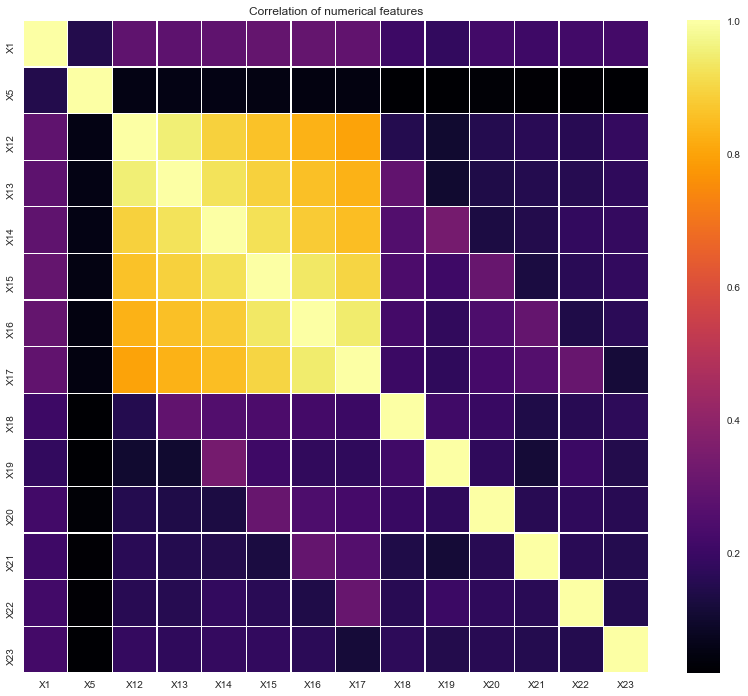

In [378]:
# 3) Check for linear relationship with corr plot
import seaborn as sns
plt.figure(figsize= (14,12))
sns.heatmap(data= train[numcols].corr(),cmap = 'inferno',linewidths =0.25)
plt.title('Correlation of numerical features')
plt.show()
## Am I correct by NOT putting 'Y' in the plot since it's not a continuous var?

In [379]:
# X12, X13,X14,X15,X16,X17 with each other 

In [380]:
train.iloc[:,1:24].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,200000,2,3,1,53,0,0,0,0,0,...,130376,133207,136159,138741,6500,5000,5000,5100,5000,5400
1,130000,2,3,2,39,0,0,0,2,0,...,133745,130814,130758,123468,7500,10000,0,4500,4500,4179
2,350000,2,1,2,41,0,0,0,0,0,...,119522,119947,117328,118400,6000,5900,5800,4100,4500,5000
3,240000,2,2,1,43,1,-2,-2,-1,0,...,0,12700,12500,26225,0,0,12700,0,13725,0
4,180000,1,2,2,28,-1,-1,-1,-1,-1,...,832,332,416,416,0,416,332,500,3500,832


In [381]:
LogisticRegression.fit?

In [382]:
X =train.iloc[:,1:24]
Y =train.loc[:,'Y']

In [383]:
# split train data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [384]:
# 5) Use logistic regression since the response var is categorical : Yes =1, No= 0
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
lr.fit(X_train,Y_train) # When I put self in the function it gives me an error ?? eg: lr.fit(train, X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [385]:
lr.coef_

array([[ -3.23792869e-06,  -9.74650156e-04,  -1.13693311e-03,
         -1.06296047e-03,  -1.40343502e-02,   1.96505226e-03,
          1.50167730e-03,   1.31978759e-03,   1.22178918e-03,
          1.11225985e-03,   1.04391595e-03,  -1.05870974e-05,
          7.68637527e-06,   2.96053394e-06,  -1.29488776e-06,
          4.24397885e-06,   9.74100693e-07,  -2.61161342e-05,
         -2.01392697e-05,  -5.67584688e-06,  -1.00461013e-05,
         -1.34634082e-05,  -1.53506993e-06]])

In [386]:
pred = lr.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [387]:
# 6) Model Evaluation
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,pred)
confusion_matrix
# 3922 is correctly predicted out of 5000 test obvervations
# Accuracy = (3922+ 0)/5000 =  78.44% ---> not very good

array([[3922,    1],
       [1077,    0]])

In [388]:
print(metrics.classification_report(Y_test,pred))
# 

             precision    recall  f1-score   support

          0       0.78      1.00      0.88      3923
          1       0.00      0.00      0.00      1077

avg / total       0.62      0.78      0.69      5000



In [389]:
metrics.regression.r2_score(Y_test,pred) 
## why a negative Value???

-0.27571820686563608

In [404]:
metrics.regression.mean_squared_error(Y_test, pred,) 

0.21560000000000001

In [405]:
# 7) use the model make prediction on test dataset
test.head()

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,25001,180000,1,1,2,27,-1,0,0,0,...,6482,3246,2016,2334,12000,5004,1000,1000,2300,3000
1,25002,230000,2,3,1,52,-2,-2,-2,-2,...,2233,1410,0,0,3939,2244,1421,0,0,236
2,25003,150000,2,1,2,28,-1,-1,2,-1,...,1159,1159,11476,10249,2468,0,1159,11476,0,2034
3,25004,160000,1,1,1,40,0,0,2,2,...,3503,-473,3757,3286,3000,0,0,4700,0,3000
4,25005,20000,2,2,2,26,0,0,0,0,...,8515,6584,3403,3748,2600,1500,1500,1000,402,0


In [406]:
lr.fit(X,Y) # train on the whole train data first
y = pd.DataFrame(lr.predict(test.iloc[:,1:24]), columns =['Y'])

In [407]:
y.head()

,Y
0,0
1,0
2,0
3,0
4,0


In [408]:
1 in Y 

True

In [409]:
y.to_csv('Submmission.csv', index=False)